In [2]:
import nibabel as nib
import numpy as np

nifti_path = "/media/das/CREST Data/David_S_Data/Cori_Data/TJU-002/TJU-P02-INJ2-CEUS_08.57.29/TJU-P02-INJ2-CEUS_08.57.29/TJU-P02-INJ2-CEUS_08.57.29_mf_sip_capture_50_2_1_0.raw_CEUS.nii.gz"

In [20]:
nibImg = nib.load(nifti_path, mmap=False)
dataNibImg = nibImg.get_fdata(dtype=np.float16)

In [21]:
clippedFact = 0.95; dynRange = 80
for f in range(dataNibImg.shape[3]):
    clippedMax = clippedFact*np.amax(dataNibImg[:,:,:,f])
    dataNibImg[:,:,:,f] = np.clip(dataNibImg[:,:,:,f], clippedMax - dynRange, clippedMax)
    dataNibImg[:,:,:,f] -= np.amin(dataNibImg[:,:,:,f])
    dataNibImg[:,:,:,f] *= 255/np.amax(dataNibImg[:,:,:,f])

In [22]:
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output2.avi', cv2.VideoWriter_fourcc(*'DIVX'), frame_rate, (dataNibImg.shape[0], dataNibImg.shape[1]), isColor=False)

# Write each frame to the video
for i in range(dataNibImg.shape[3]):
    frame = np.rot90(np.flipud(dataNibImg[:, :, 100, i]), 3).astype(np.uint8)
    out.write(frame)

# Release the VideoWriter object
out.release()

In [ ]:
def generate_video():
    video_name = 'mygeneratedvideo.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith((".jpg", ".jpeg", ".png"))]
    print("Images:", images)

    # Set frame from the first image
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    # Video writer to create .avi file
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

    # Appending images to video
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    # Release the video file
    video.release()
    cv2.destroyAllWindows()
    print("Video generated successfully!")

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .avi

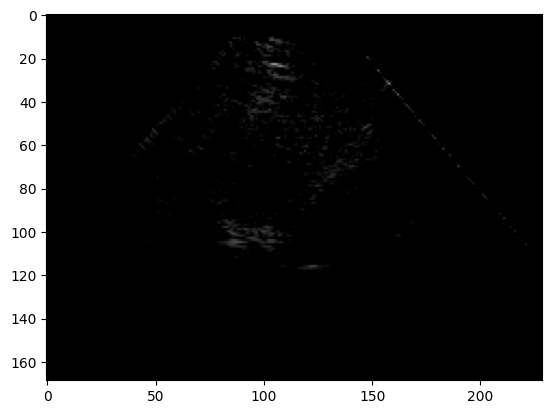

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the frame rate
frame_rate = 15  # frames per second

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the image
img = ax.imshow(np.rot90(dataNibImg[:, :, 100, 0], 3), cmap='gray')

# Update function for animation
def update(frame):
    img.set_data(np.rot90(dataNibImg[:, :, 100, frame], 3))
    return img,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=dataNibImg.shape[2], interval=1000/frame_rate, blit=True)

# Save the animation as an AVI file
ani.save('test.', writer='ffmpeg', fps=frame_rate)
plt.show()